<a href="https://colab.research.google.com/github/SaajidPasha10/Mathematics/blob/main/Statistics/5_num_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook contains the following:

1. 5 Number summary in Descriptive Statistics
2. Analyzing and visualizing the restaurant "Tips" dataset from Seaborn
3. [Five Number Summary](#summary)
4. [Histogram to visualize the skewness of the data](#histogram)
5. [Box plot to visualize the tips vs gender and tips vs day](#tips-plot)
6. [Plot to Visualize the outliers](#outliers)
7. [Plotly plot for advanced visualization](#plotly)

The 5-number summary is a quick way to describe a dataset's distribution using five key values. It’s widely used in descriptive statistics, including in machine learning (ML) for exploratory data analysis (EDA) and outlier detection.

📌 The 5 Numbers Are:
Minimum – the smallest data point.

First Quartile (Q1) – 25th percentile (25% of the data is below this point).

Median (Q2) – 50th percentile (middle value).

Third Quartile (Q3) – 75th percentile.

Maximum – the largest data point.



In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = sns.load_dataset("tips")
df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [86]:
# let us choose total_bill numerical values for analysis
# drop missing values
data = df['total_bill'].dropna().values
data.shape


(244,)

<a id="summary"></a>
Five Number Summary

In [87]:

minimum = np.min(data)
maximum = np.max(data)
Q1 = np.percentile(data,25)
Q3 = np.percentile(data,75)
median = np.median(data)
five_num_summary = {"minimum":minimum,"maximum":maximum,"Q1":Q1,"Q3":Q3,"median":median}
print(five_num_summary)

{'minimum': np.float64(3.07), 'maximum': np.float64(50.81), 'Q1': np.float64(13.3475), 'Q3': np.float64(24.127499999999998), 'median': np.float64(17.795)}


In [88]:
# Calculate IQR(Inter Quartile Range)
IQR = Q3-Q1
lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5
outliers = [x for x in data if x < lower_bound or x > upper_bound]
outliers

[np.float64(48.27),
 np.float64(44.3),
 np.float64(41.19),
 np.float64(48.17),
 np.float64(50.81),
 np.float64(45.35),
 np.float64(40.55),
 np.float64(43.11),
 np.float64(48.33)]

### Histogram

Text(0, 0.5, 'Count')

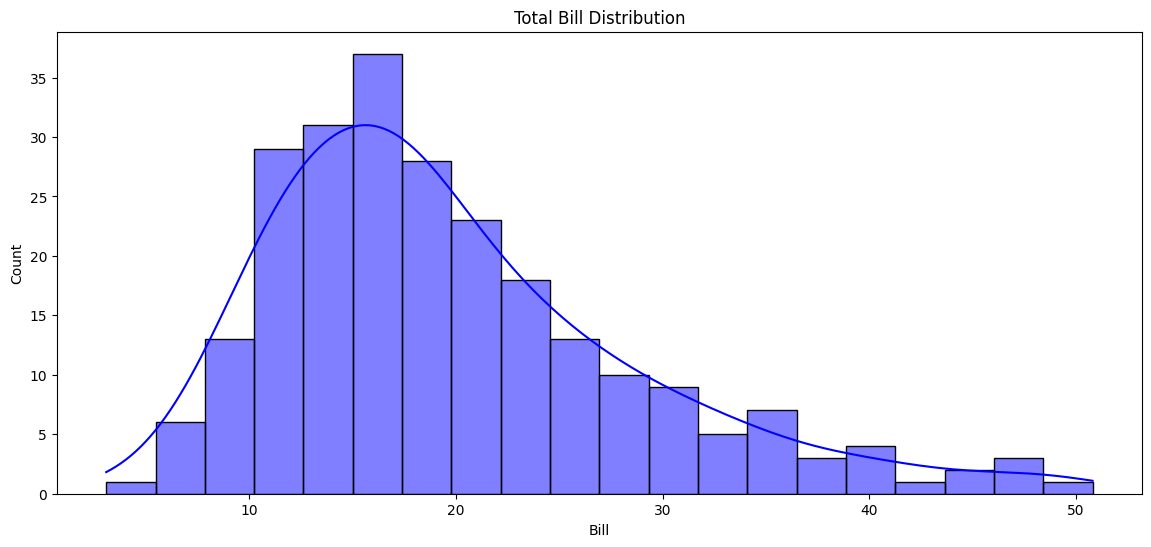

In [89]:
# Visualization
# PLOT 1 : HISTOGRAM + KDE(Kernel Density Estimation) --> Displays the general shape, central tendency, and any skew.
plt.subplots(1,1,figsize=(14,6)) # Create a subplot with 1 row, 2 columns and 1 position
sns.histplot(data,kde=True,bins=20,color="blue")
plt.title("Total Bill Distribution")
plt.xlabel("Bill")
plt.ylabel("Count")

# Here we can see from the plot that data distribution is right skewed

### Tips Plot

Text(0, 0.5, 'Tip in $')

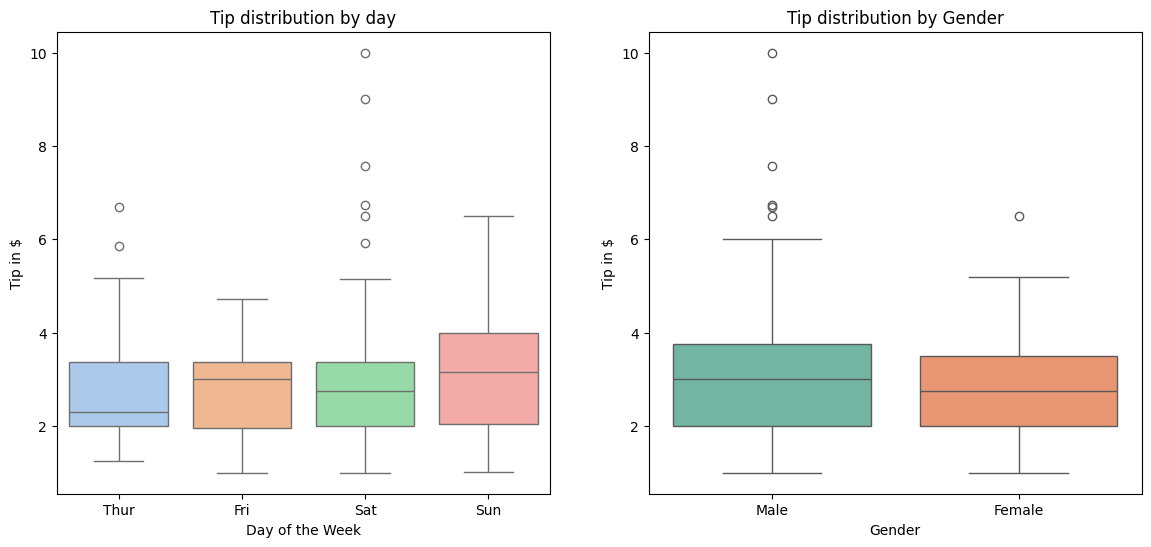

In [90]:
# PLOT 2

# TO Visualize the tips by day --> Which day are getting more tips
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='day',y='tip',data=df,palette='pastel',hue='day')
plt.title("Tip distribution by day")
plt.xlabel("Day of the Week")
plt.ylabel("Tip in $")

# TO Visualize the tips by gender --> how genders are paying  tips
plt.subplot(1,2,2)
sns.boxplot(x='sex',y='tip',data=df,palette='Set2',hue='sex')
plt.title("Tip distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Tip in $")

### Outliers

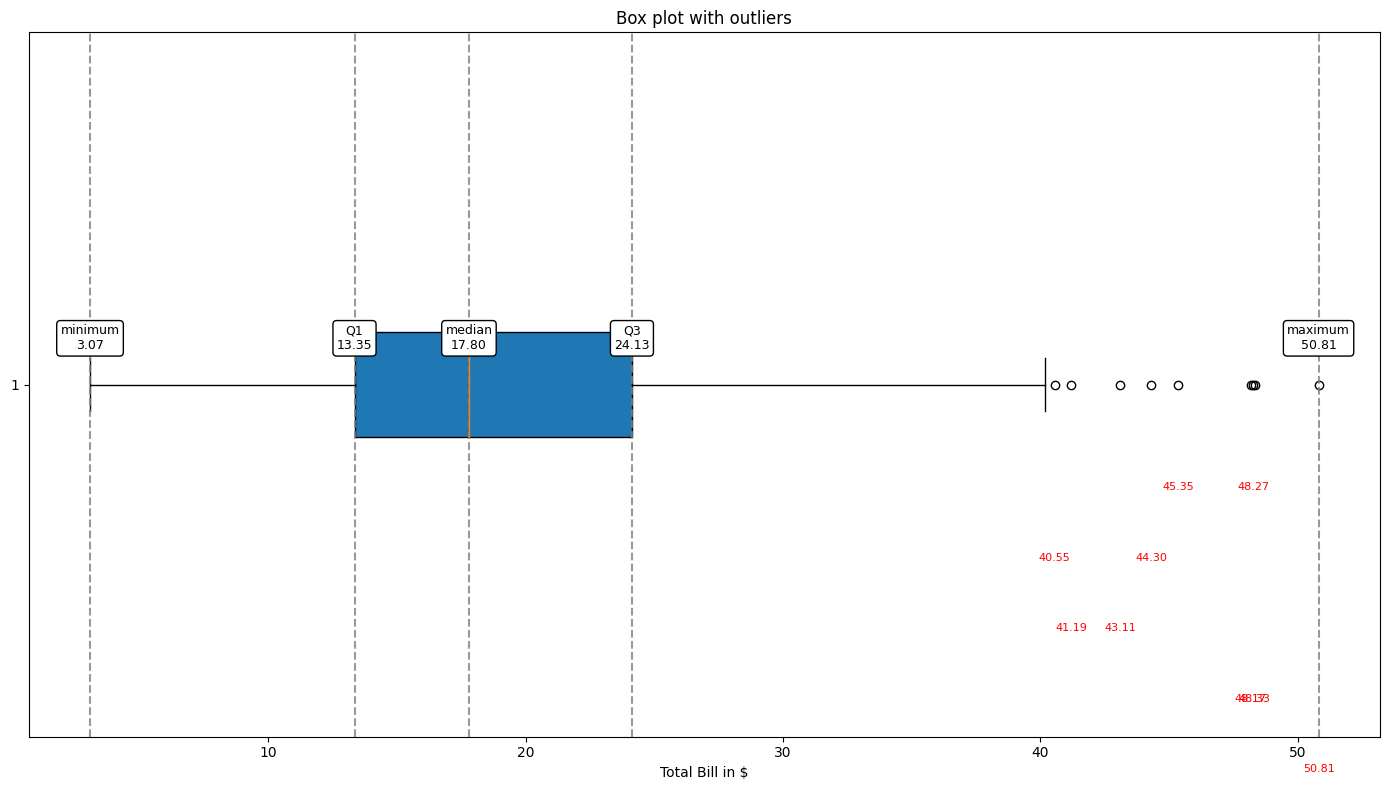

In [91]:
# PLOT 3 - horizontal box plot with red circles for outliers
plt.subplots(1,1,figsize=(14, 8))
plt.boxplot(
    data,vert=False,
    patch_artist=True, # fill the box with color
    flierprops=dict(marker='o', color='red', markersize=6) )
plt.title("Box plot with outliers")
plt.xlabel("Total Bill in $")

# Take 5 summary data and add it to the plot
for label, val in five_num_summary.items():
  plt.axvline(val,linestyle="--",color='gray',alpha=0.8) # draw a dashed line at value
  plt.text(val,
           1.05, # slightly above the box
           f"{label}\n{val:.2f}",  # Label with value
        ha='center',
        fontsize=9,
        bbox=dict(
            facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'
        )
    )
# Outliers in red
for i,outlier in enumerate(outliers):
  # Add this (0.85 - (i % 5) * 0.1) to add spacing above / below
  plt.text(outlier, (0.85 - (i % 5) * 0.1),f"{outlier:.2f}",ha="center",fontsize=8,color='red')
plt.tight_layout()
plt.show()

### Plotly

In [92]:
# Visualizing with plotly

import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
tips = sns.load_dataset('tips')

# Calculate tip percentage
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100

# 1️⃣ Scatter Plot: Tip vs Total Bill
fig1 = px.scatter(
    tips, x='total_bill', y='tip',
    color='sex',
    hover_data=['day', 'time', 'size'],
    title='💸 Tip vs Total Bill by Gender'
)
fig1.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
fig1.update_layout(xaxis_title='Total Bill ($)', yaxis_title='Tip ($)')
fig1.show()

# 2️⃣ Box Plot: Tip % by Day
fig2 = px.box(
    tips, x='day', y='tip_pct', color='day',
    title='📦 Tip Percentage by Day',
    points='all'
)
fig2.update_layout(yaxis_title='Tip Percentage (%)', showlegend=False)
fig2.show()

# 3️⃣ Violin Plot: Tip by Gender
fig3 = px.violin(
    tips, x='sex', y='tip', color='sex',
    box=True,  # include box inside violin
    points='all',  # show all data points
    title='🎻 Tip Distribution by Gender (Violin Plot)'
)
fig3.update_layout(yaxis_title='Tip ($)', xaxis_title='Gender')
fig3.show()